In [ ]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,420 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87159 entries, 0 to 87158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 87159 non-null  object 
 1   Age                87159 non-null  int64  
 2   Gender             87159 non-null  object 
 3   Country            87159 non-null  object 
 4   Race               87159 non-null  object 
 5   Family_Background  87159 non-null  object 
 6   Radiation_History  87159 non-null  object 
 7   Iodine_Deficiency  87159 non-null  object 
 8   Smoke              87159 non-null  object 
 9   Weight_Risk        87159 non-null  object 
 10  Diabetes           87159 non-null  object 
 11  Nodule_Size        87159 non-null  float64
 12  TSH_Result         87159 non-null  float64
 13  T4_Result          87159 non-null  float64
 14  T3_Result          87159 non-null  float64
 15  Cancer             87159 non-null  int64  
dtypes: float64(4), int64(2

In [ ]:
train_df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Race,0
Family_Background,0
Radiation_History,0
Iodine_Deficiency,0
Smoke,0
Weight_Risk,0


In [ ]:
train_df.describe()

,Age,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer
count,87159.000000,87159.000000,87159.000000,87159.000000,87159.000000,87159.000000
mean,50.860244,2.508098,5.056871,8.248796,2.005002,0.119999
std,21.638687,1.441928,2.861229,2.165975,0.867013,0.324962
min,14.000000,0.000000,0.100000,4.500000,0.500000,0.000000
25%,32.000000,1.270332,2.582845,6.372031,1.254836,0.000000
50%,51.000000,2.520941,5.059085,8.236789,2.004101,0.000000
75%,70.000000,3.760938,7.541586,10.126981,2.758032,0.000000
max,88.000000,5.000000,10.000000,12.000000,3.500000,1.000000


In [ ]:
train_df.sample(5)

,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer
29648,TRAIN_29648,82,F,NGA,ASN,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,No,3.980891,7.243523,11.584947,1.008179,0
81810,TRAIN_81810,42,M,GBR,AFR,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,3.320965,0.668803,11.479594,2.025733,0
37490,TRAIN_37490,20,F,IND,CAU,Positive,Unexposed,Sufficient,Non-Smoker,Obese,No,0.590350,0.603115,9.104459,3.016451,0
41954,TRAIN_41954,87,M,JPN,CAU,Negative,Unexposed,Sufficient,Smoker,Obese,No,2.810439,9.562967,11.735810,2.476336,0
25877,TRAIN_25877,77,F,CHN,ASN,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,4.770773,6.357444,7.122328,2.248436,1


<ipython-input-8-18a1e40b6e36>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


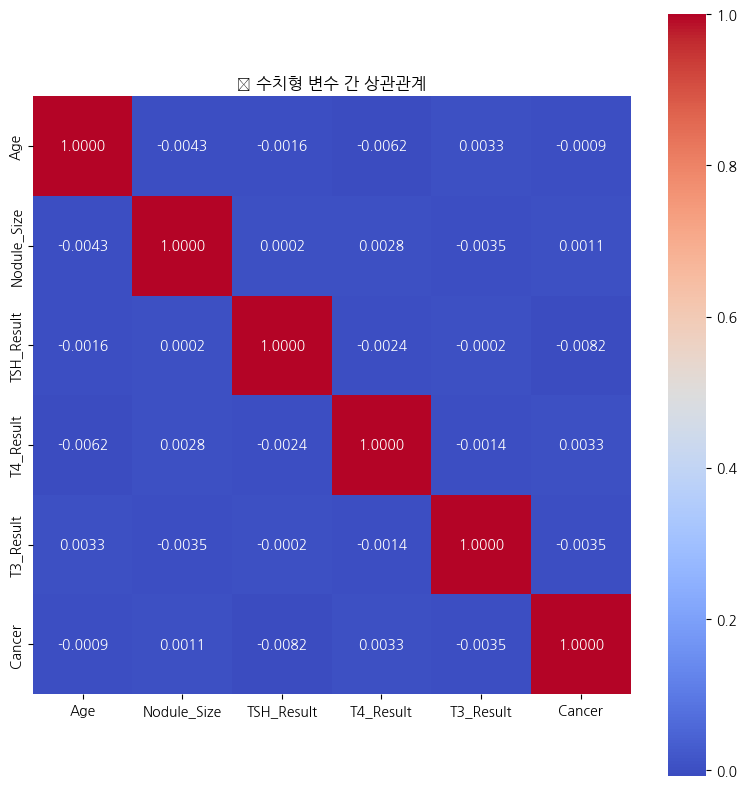

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 추출
num_cols = train_df.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corr_matrix = num_cols.corr()

# 시각화
plt.figure(figsize=(8, 8))

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='coolwarm', square=True)
plt.title("📊 수치형 변수 간 상관관계")
plt.tight_layout()
plt.show()

In [ ]:
train_df.nunique()

,0
ID,87159
Age,75
Gender,2
Country,10
Race,5
Family_Background,2
Radiation_History,2
Iodine_Deficiency,2
Smoke,2
Weight_Risk,2


In [ ]:
gender_map = {'F':0, 'M':1}
train_df['Gender']=train_df['Gender'].map(gender_map)
test_df['Gender']=test_df['Gender'].map(gender_map)

family_background_map = {'Negative':0, 'Positive':1}
train_df['Family_Background']=train_df['Family_Background'].map(family_background_map)
test_df['Family_Background']=test_df['Family_Background'].map(family_background_map)

radiation_map = {'Unexposed':0, 'Exposed':1}
train_df['Radiation_History']=train_df['Radiation_History'].map(radiation_map)
test_df['Radiation_History']=test_df['Radiation_History'].map(radiation_map)

iodine_map={'Sufficient':0, 'Deficient':1}
train_df['Iodine_Deficiency']=train_df['Iodine_Deficiency'].map(iodine_map)
test_df['Iodine_Deficiency']=test_df['Iodine_Deficiency'].map(iodine_map)

smoke_map={'Non-Smoker':0, 'Smoker':1}
train_df['Smoke']=train_df['Smoke'].map(smoke_map)
test_df['Smoke']=test_df['Smoke'].map(smoke_map)

weight_map={'Not Obese':0, 'Obese':1}
train_df['Weight_Risk']=train_df['Weight_Risk'].map(weight_map)
test_df['Weight_Risk']=test_df['Weight_Risk'].map(weight_map)

diabetes_map={'No':0, 'Yes':1}
train_df['Diabetes'] = train_df['Diabetes'].map(diabetes_map)
test_df['Diabetes'] = test_df['Diabetes'].map(diabetes_map)

train_df = pd.get_dummies(train_df, columns=['Country', 'Race'])
test_df = pd.get_dummies(test_df, columns=['Country', 'Race'])
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

In [ ]:
train_df.sample(5)

,ID,Age,Gender,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,...,Country_JPN,Country_KOR,Country_NGA,Country_RUS,Country_USA,Race_AFR,Race_ASN,Race_CAU,Race_HSP,Race_MDE
63884,TRAIN_63884,20,0,0,1,0,1,0,0,4.850840,...,False,False,False,False,False,False,True,False,False,False
5091,TRAIN_05091,25,1,1,0,0,1,0,0,3.730158,...,False,False,False,False,False,True,False,False,False,False
44897,TRAIN_44897,44,1,0,1,0,0,1,0,4.850840,...,False,False,False,True,False,False,False,False,True,False
30354,TRAIN_30354,17,0,0,0,0,1,0,0,0.160492,...,False,False,False,False,False,False,False,True,False,False
39422,TRAIN_39422,17,0,0,0,1,0,0,1,4.640666,...,False,False,False,False,True,False,False,False,False,True


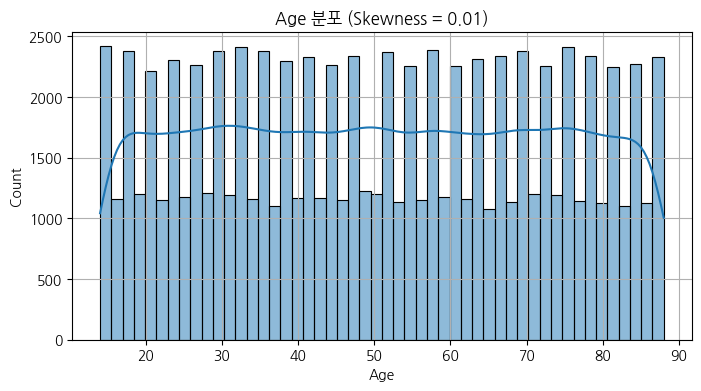

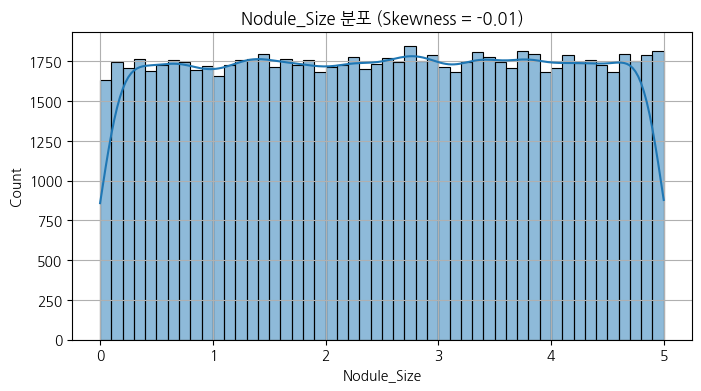

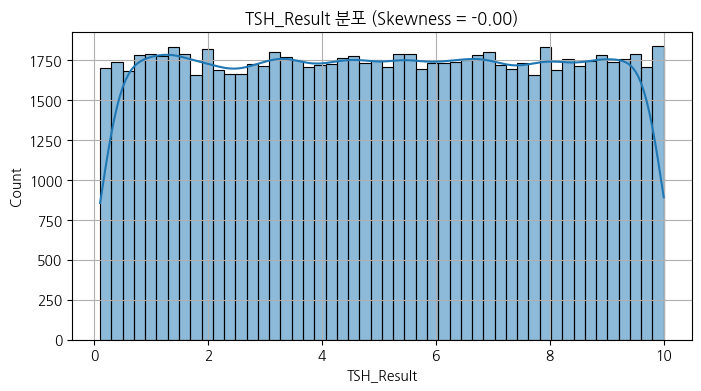

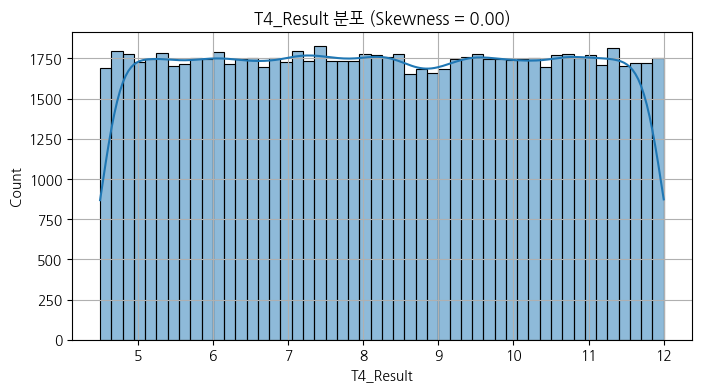

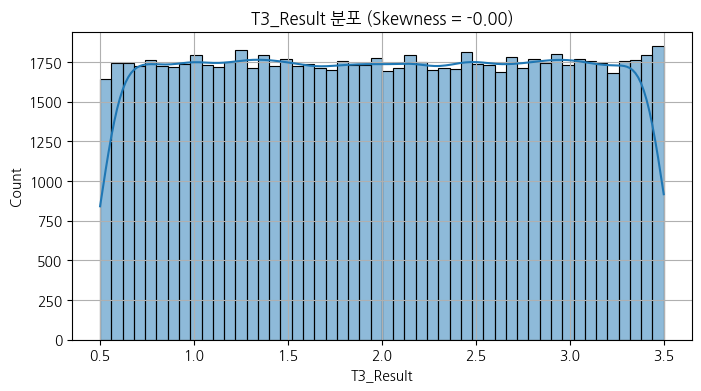

In [ ]:
numeric_cols = ['Age', 'Nodule_Size', 'TSH_Result','T4_Result', 'T3_Result']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f'{col} 분포 (Skewness = {train_df[col].skew():.2f})')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score
import numpy as np
import pandas as pd

# 타겟 변수
target = 'Cancer'

# 학습에 사용할 피처
features = [col for col in train_df.columns if col not in ['ID', target]]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

rmse = mean_squared_error(y_val, y_pred) ** 0.5
mae = mean_absolute_error(y_val, y_pred)
f1 = f1_score(y_val,y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}" )
print(f"F1_score : {f1:.4f}")

RMSE: 0.3443
MAE : 0.1186
F1_score : 0.2986


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split

# 데이터 준비 (동일)
features = [col for col in train_df.columns if col not in ['ID', target]]
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 평가
rmse = mean_squared_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"[LightGBM] RMSE: {rmse:.4f}")
print(f"[LightGBM] MAE: {mae:.4f}")
print(f"[LightGBM] F1 Score: {f1:.4f}")

[LightGBM] [Info] Number of positive: 8357, number of negative: 61370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119853 -> initscore=-1.993822
[LightGBM] [Info] Start training from score -1.993822
[LightGBM] RMSE: 0.3451
[LightGBM] MAE: 0.1191
[LightGBM] F1 Score: 0.3001


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split

# 데이터 준비 (동일)
features = [col for col in train_df.columns if col not in ['ID', target]]
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 평가
rmse = mean_squared_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"[XGBoost] RMSE: {rmse:.4f}")
print(f"[XGBoost] MAE: {mae:.4f}")
print(f"[XGBoost] F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:51:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[XGBoost] RMSE: 0.3440
[XGBoost] MAE: 0.1183
[XGBoost] F1 Score: 0.3153


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split

# 데이터 준비 (동일)
features = [col for col in train_df.columns if col not in ['ID', target]]
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 (max_iter 늘리기 권장)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 평가
rmse = mean_squared_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"[Logistic Regression] RMSE: {rmse:.4f}")
print(f"[Logistic Regression] MAE: {mae:.4f}")
print(f"[Logistic Regression] F1 Score: {f1:.4f}")

[Logistic Regression] RMSE: 0.3477
[Logistic Regression] MAE: 0.1209
[Logistic Regression] F1 Score: 0.0066


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
result = pd.DataFrame({
    'ID': test_df['ID'],
    'Cancer': test_preds
})

# 결과 저장
result.to_csv('result.csv', index=False)

print("✅ 제출 파일 'result.csv' 생성 완료!")

✅ 제출 파일 'result.csv' 생성 완료!


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
import pandas as pd
import numpy as np

target = 'Cancer'
features = [col for col in train_df.columns if col not in ['ID', target]]

X = train_df[features].values
y = train_df[target].values

# --- 정규화 (딥러닝에서는 필수) --- #
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- 학습/검증 분리 --- #
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- PyTorch Dataset --- #
class CancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_dataset = CancerDataset(X_train, y_train)
val_dataset = CancerDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=False)

# --- 모델 정의 --- #
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

# --- 학습 --- #
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_dim=X.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # 검증
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_pred = model(X_batch).cpu().numpy().flatten()
            y_pred_list.extend(y_pred)
            y_true_list.extend(y_batch.numpy().flatten())

    # threshold 조정
    y_pred_binary = (np.array(y_pred_list) > 0.3).astype(int)
    f1 = f1_score(y_true_list, y_pred_binary)
    auc = roc_auc_score(y_true_list, y_pred_list)

    print(f"[Epoch {epoch+1}] F1: {f1:.4f} | AUC: {auc:.4f} | Loss: {loss.item():.4f}")

[Epoch 1] F1: 0.4655 | AUC: 0.6994 | Loss: 0.2845
[Epoch 2] F1: 0.4875 | AUC: 0.6989 | Loss: 0.3132
[Epoch 3] F1: 0.4888 | AUC: 0.6961 | Loss: 0.2642
[Epoch 4] F1: 0.4886 | AUC: 0.7005 | Loss: 0.2976
[Epoch 5] F1: 0.4886 | AUC: 0.6941 | Loss: 0.3345
[Epoch 6] F1: 0.4886 | AUC: 0.6943 | Loss: 0.3707
[Epoch 7] F1: 0.4886 | AUC: 0.6962 | Loss: 0.4261
[Epoch 8] F1: 0.4886 | AUC: 0.6888 | Loss: 0.3668
[Epoch 9] F1: 0.4886 | AUC: 0.6928 | Loss: 0.2681
[Epoch 10] F1: 0.4886 | AUC: 0.6983 | Loss: 0.1710


In [ ]:
# 전처리: test 데이터 정규화 및 텐서 변환
X_test = test_df[features].values
X_test = scaler.transform(X_test)  # 학습 시 사용한 StandardScaler로 정규화
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# 예측 수행
model.eval()
with torch.no_grad():
    test_preds_proba = model(X_test_tensor).cpu().numpy().flatten()

# 임계값 적용 (예: 0.3 기준)
test_preds = (test_preds_proba > 0.3).astype(int)

# 제출용 데이터프레임 생성
result = pd.DataFrame({
    'ID': test_df['ID'],
    'Cancer': test_preds
})

# 결과 저장
result.to_csv('result.csv', index=False)
print("✅ 제출 파일 'result.csv' 생성 완료!")

✅ 제출 파일 'result.csv' 생성 완료!
